In [23]:
import numpy as np
import pandas as pd
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sb

warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
#getting data from the FPL API 
url ='https://fantasy.premierleague.com/api/bootstrap-static/'
r =requests.get(url)
json=r.json()

In [25]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [26]:
elements_df= pd.DataFrame(json['elements'])

In [27]:
elements_df.shape

(624, 67)

In [28]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [29]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,-1,1,-4,4,0,1,-0.5,...,549,54,335,23,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,389,14,448,41,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,...,619,252,619,252,NaN,,NaN,,NaN,
3,100.0,100.0,54694,1,-1,1,-1,0,4,3.5,...,5,2,21,5,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-3,3,0,2,-0.5,...,368,132,346,122,NaN,,NaN,,NaN,


In [30]:
#pulling important data from the general table
base_elements_df=elements_df[['team','web_name','element_type','now_cost','total_points','selected_by_percent','penalties_order','ep_next','ep_this','ict_index_rank','ict_index_rank_type','news','transfers_in_event','transfers_out_event']]

In [31]:
base_elements_df.head()

,team,web_name,element_type,now_cost,total_points,selected_by_percent,penalties_order,ep_next,ep_this,ict_index_rank,ict_index_rank_type,news,transfers_in_event,transfers_out_event
0,1,Leno,1,46,4,1.0,NaN,-0.5,1.0,335,23,,628,2134
1,1,Rúnarsson,1,40,0,0.8,NaN,0.0,0.0,448,41,Joined OH Leuven on a season-long loan - Expec...,0,959
2,1,Willian,3,63,0,0.1,NaN,0.0,0.0,619,252,Transferred to Corinthians,0,41
3,1,Aubameyang,4,101,38,5.7,1.0,3.5,5.0,21,5,,15069,47229
4,1,Cédric,2,42,1,0.2,NaN,-0.5,1.0,346,122,,162,318


In [32]:
#replacing numbers with players position
base_elements_df['element_type']=base_elements_df['element_type'].map({4:'Forward',3:'Midfielder',2:'Defender',1:'Goalkeeper'})

In [33]:
#replacing numbers with teams names
base_elements_df['team']=base_elements_df['team'].map({1:'Arsenal',2:'Aston Villa',3:'Brentford',4:'Brighton',5:'Burnley',6:'Chelsea',7:'Crystal Palace',8:'Everton',9:'Leiceter',10:'Leeds Utd',11:'Liverpool',12:'Man City',13:'Man Utd',14:'Newcastle',15:'Norwich',16:'Southampton',17:'Spurs',18:'Watford',19:'West Ham',20:'Wolves'})

In [34]:
base_elements_df['now_cost']=base_elements_df['now_cost']/10

In [35]:
base_elements_df.columns=['team','player','position','cost','total_points','selected_by%','penalties_order','Expected_points_next_week','Expected_points_this_week','ict_index_rank','ict_index_rank_type','status','transfers_out_event','transfers_in_event']

In [36]:
base_elements_df['selected_by%']=base_elements_df['selected_by%'].astype(float)

In [37]:

#base_elements_df['status']=base_elements_df['status'].map({'a':'fit','u':'joined another team','s':'suspended','d':'light injury','i':'hard injury','n':'suspended by club'})

In [38]:
base_elements_df['penalties_order'][base_elements_df['penalties_order'].isnull()]=0
base_elements_df['penalties_order']=base_elements_df['penalties_order'].astype(int)

In [39]:
base_elements_df.head()

,team,player,position,cost,total_points,selected_by%,penalties_order,Expected_points_next_week,Expected_points_this_week,ict_index_rank,ict_index_rank_type,status,transfers_out_event,transfers_in_event
0,Arsenal,Leno,Goalkeeper,4.6,4,1.0,0,-0.5,1.0,335,23,,628,2134
1,Arsenal,Rúnarsson,Goalkeeper,4.0,0,0.8,0,0.0,0.0,448,41,Joined OH Leuven on a season-long loan - Expec...,0,959
2,Arsenal,Willian,Midfielder,6.3,0,0.1,0,0.0,0.0,619,252,Transferred to Corinthians,0,41
3,Arsenal,Aubameyang,Forward,10.1,38,5.7,1,3.5,5.0,21,5,,15069,47229
4,Arsenal,Cédric,Defender,4.2,1,0.2,0,-0.5,1.0,346,122,,162,318


In [40]:
base_elements_df.sort_values(['selected_by%'],ascending=[False]).head(10)

,team,player,position,cost,total_points,selected_by%,penalties_order,Expected_points_next_week,Expected_points_this_week,ict_index_rank,ict_index_rank_type,status,transfers_out_event,transfers_in_event
334,Liverpool,Salah,Midfielder,13.0,117,71.6,2,12.3,12.3,1,1,,34523,6182
572,West Ham,Antonio,Forward,8.2,61,47.8,3,3.5,2.5,2,1,,111026,36996
408,Man Utd,Ronaldo,Forward,12.4,38,31.7,2,5.0,3.5,27,7,,49970,63024
578,West Ham,Benrahma,Midfielder,6.4,57,30.0,0,3.7,2.7,17,12,,31000,80976
266,Leiceter,Vardy,Forward,10.8,60,29.9,1,2.0,3.0,15,3,,45079,94092
338,Liverpool,Alexander-Arnold,Defender,7.7,64,29.7,0,7.7,7.7,6,1,,101538,8229
361,Man City,Cancelo,Defender,6.5,67,28.4,0,6.3,6.3,24,2,,213128,6387
367,Man City,Dias,Defender,6.1,49,25.9,0,3.0,3.0,100,19,,14474,45512
104,Brighton,Duffy,Defender,4.4,42,23.9,0,1.8,2.3,75,11,,13829,40037
525,Watford,Foster,Goalkeeper,4.1,23,22.8,0,2.8,2.8,262,17,,31101,10362


In [41]:
base_elements_df[base_elements_df['player']=='Fred']

,team,player,position,cost,total_points,selected_by%,penalties_order,Expected_points_next_week,Expected_points_this_week,ict_index_rank,ict_index_rank_type,status,transfers_out_event,transfers_in_event
387,Man Utd,Fred,Midfielder,4.9,19,0.4,0,2.2,0.7,164,82,,983,1222


In [42]:
base_elements_df['Expected_points_next_week']=base_elements_df['Expected_points_next_week'].astype('float')

## Differentials Extraction

In [44]:
diff=base_elements_df[(base_elements_df['Expected_points_next_week']>=5) & (base_elements_df['selected_by%']<=11)]
diff.head(10)

,team,player,position,cost,total_points,selected_by%,penalties_order,Expected_points_next_week,Expected_points_this_week,ict_index_rank,ict_index_rank_type,status,transfers_out_event,transfers_in_event
21,Arsenal,Gabriel,Defender,5.1,46,2.2,0,5.3,6.8,150,42,,19248,9994
33,Arsenal,Ramsdale,Goalkeeper,4.7,46,10.4,0,5.0,6.5,267,18,,81925,11356
112,Brighton,Trossard,Midfielder,6.5,51,2.5,5,6.0,6.5,9,7,,35977,4399
162,Burnley,Cornet,Midfielder,6.0,33,1.3,0,6.3,5.3,126,65,,23596,6187
168,Chelsea,Jorginho,Midfielder,5.8,33,4.4,1,5.5,6.0,130,68,,7985,11474
184,Chelsea,Hudson-Odoi,Midfielder,5.3,21,0.7,0,5.0,5.5,132,70,,4138,4250
185,Chelsea,Havertz,Midfielder,8.1,36,7.5,0,5.5,6.0,80,46,,21544,19874
211,Crystal Palace,Mitchell,Defender,4.5,38,1.1,0,5.5,5.0,129,34,,10909,1755
323,Liverpool,Henderson,Midfielder,5.0,38,2.0,0,5.7,5.7,57,38,,15063,7826
331,Liverpool,Mané,Midfielder,11.9,59,3.9,3,5.0,5.0,4,3,,12680,13331


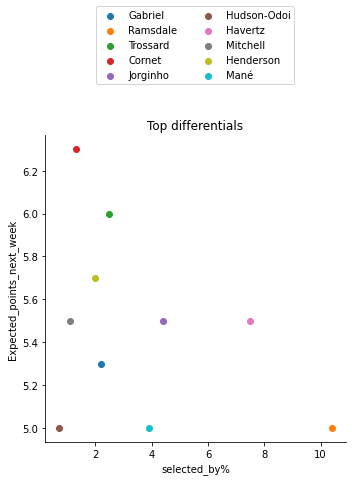

In [45]:
g=sb.FacetGrid(data=diff.head(10),hue='player',size=5)
g.map(plt.scatter,'selected_by%','Expected_points_next_week');
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.title('Top differentials');


## top expected players to get points next week

In [46]:
top_points=base_elements_df[base_elements_df['Expected_points_next_week']>=5].sort_values('Expected_points_next_week',ascending=False)
top_points.head()

,team,player,position,cost,total_points,selected_by%,penalties_order,Expected_points_next_week,Expected_points_this_week,ict_index_rank,ict_index_rank_type,status,transfers_out_event,transfers_in_event
334,Liverpool,Salah,Midfielder,13.0,117,71.6,2,12.3,12.3,1,1,,34523,6182
186,Chelsea,James,Defender,5.9,63,21.5,0,11.5,12.0,34,3,,246712,6743
179,Chelsea,Chilwell,Defender,6.0,45,19.7,0,10.2,10.7,81,14,,36241,36917
370,Man City,Foden,Midfielder,8.3,40,14.9,0,7.7,7.7,32,21,,61911,31111
579,West Ham,Bowen,Midfielder,6.3,55,2.1,0,7.7,6.7,5,4,,51858,3743


In [47]:
base_elements_df.to_excel('fpl.xlsx')